__Алгоритм Дейкстры__

Суть состоит в определении наикратчайших маршрутов от некоторых вершин графа до всех остальных его вершин

Допускаются только положительные веса

Помогает с задачами маршрутизации информационных пакетов

Основная идея: полный направленные поиск

В начале нужно определиться со стартовой вершиной:

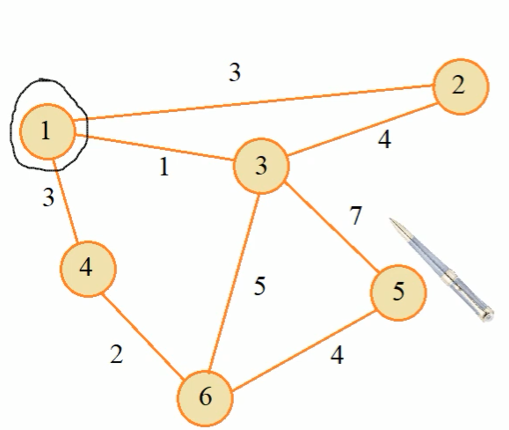

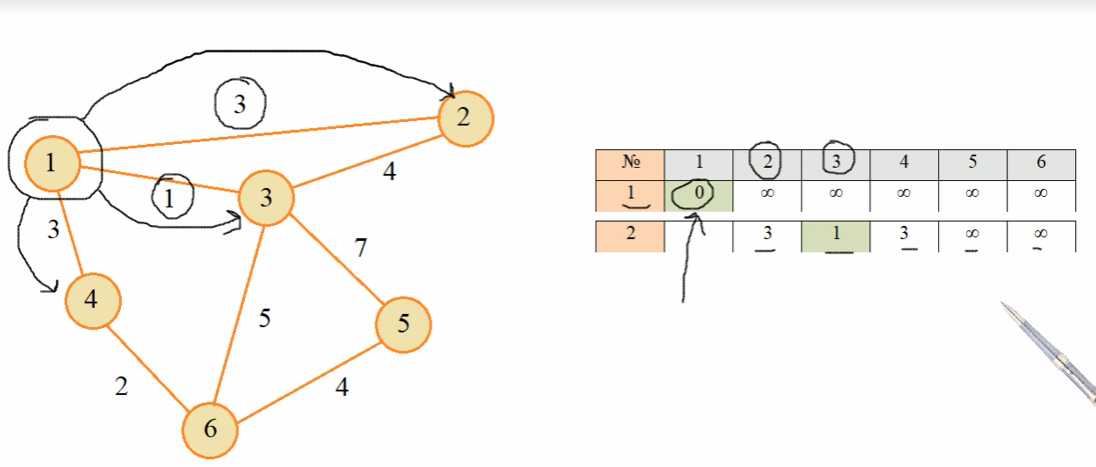

Согласно Алгоритму в след строчке таблицы выбираем вершину, которая имеет минимальный вес

В данном случае единица означает, что минимальный вес для того, чтобы пройти из вершины 0 в вершину 3 = 1

Значения, которые мы получили еще не означает, что они минимальны

Назад не возвращаемся

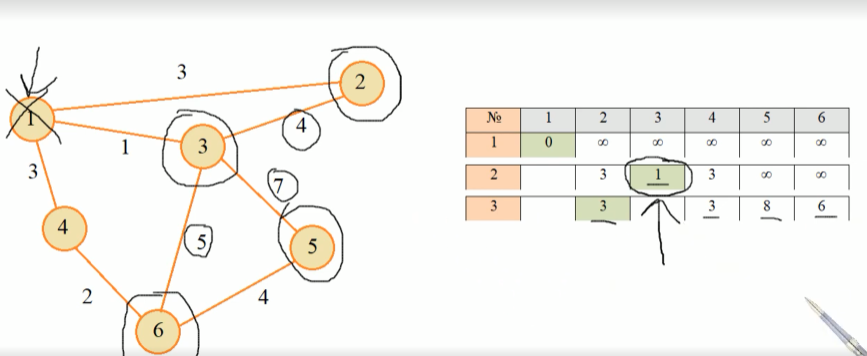

На 3 итерации для вершины 2 значение, если посчитать будет 5, но мы оставляем старое значение, так ка согласно алгоритмы мы должны прописывать то значение, которое минимально.

Дальше из всех полученных значений выбираем минимальную вершину, так как минимальный путь из 1 в 2 рассмотрели и других больше нет - берем след миниальное

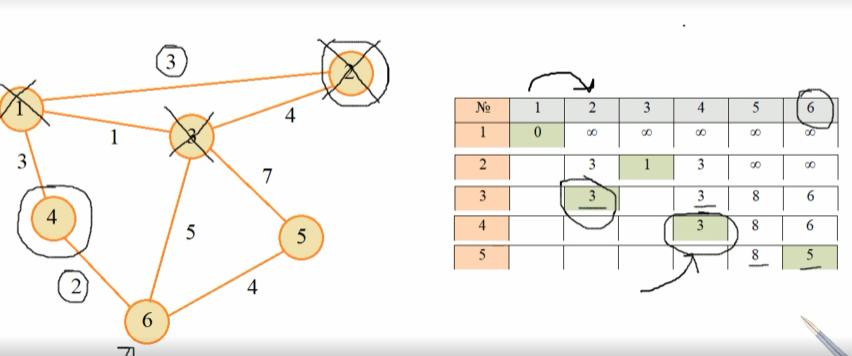

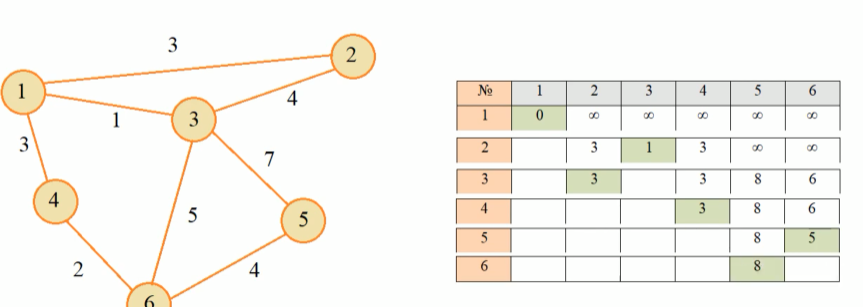

Таблица показывает минимальные веса, которые могут быть достигнуты при переходе из стратовой вершины 1 в другие вершины графа

Можно построить матрицу смежности для реализации алгоритма

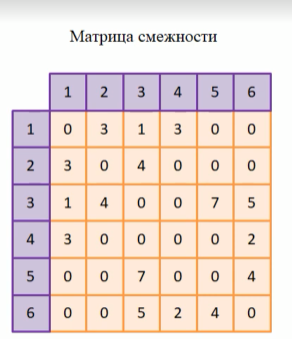

In [ ]:
import math

D = (  # 1  2  3  4  5  6
    (math.inf, 3, 1, 3, math.inf, math.inf),
    (3, math.inf, 4, math.inf, math.inf, math.inf),
    (1, 4, math.inf, math.inf, 7, 5),
    (3, math.inf, math.inf, math.inf, math.inf, 2),
    (math.inf, math.inf, 7, math.inf, math.inf, 4),
    (math.inf, math.inf, 5, 2, 4, math.inf)
)

def get_min(dist: list, visited: set) -> int:
    """Находит индекс вершины с минимальным расстоянием, не входящей в visited."""
    min_dist = math.inf
    min_index = -1
    for v in range(len(dist)):
        if v not in visited and dist[v] < min_dist:
            min_dist = dist[v]
            min_index = v
    return min_index

def dijkstra_algorithm(graph: list[list[int]], start_point: int, end_point: int) -> float:
    """Реализация алгоритма Дейкстры."""
    n = len(graph)
    dist = [math.inf] * n  # Расстояния от начальной вершины
    dist[start_node - 1] = 0  # Расстояние от начальной вершины до себя = 0
    visited = set()  # Множество посещенных вершин

    for _ in range(n):
        u = get_min(dist, visited)  # Находим ближайшую непосещенную вершину
        if u == -1:
            break  # Если все вершины посещены, выходим

        visited.add(u)  # Отмечаем вершину как посещенную

        # Обновляем расстояния до соседних вершин
        for index, weight in enumerate(graph[u]):
            if weight != math.inf:
                new_dist = dist[u] + weight
                if new_dist < dist[index]:
                    dist[index] = new_dist

    return dist[end_node - 1]  # Возвращаем кратчайшее расстояние до конечной вершины


print(dijkstra_algorithm(D, 1, 5))

8


In [41]:
   import heapq
   import sys

   def dijkstra_heap(graph, start):
       """
       Алгоритм Дейкстры с использованием heapq (бинарной кучи).
       """
       distances = {node: float('inf') for node in graph}
       distances[start] = 0
       priority_queue = [(0, start)]  # (расстояние, вершина)

       while priority_queue:
           distance, node = heapq.heappop(priority_queue)

           if distance > distances[node]:
               continue  # Уже обработали эту вершину с меньшим расстоянием

           for neighbor, weight in graph[node].items():
               new_distance = distance + weight
               if new_distance < distances[neighbor]:
                   distances[neighbor] = new_distance
                   heapq.heappush(priority_queue, (new_distance, neighbor))

       return distances

   # Пример графа (словарь смежности)
   graph = {
       'A': {'B': 4, 'C': 2},
       'B': {'A': 4, 'D': 5},
       'C': {'A': 2, 'D': 1, 'E': 3},
       'D': {'B': 5, 'C': 1, 'E': 1},
       'E': {'C': 3, 'D': 1}
   }

   start_node = 'A'
   distances = dijkstra_heap(graph, start_node)
   print(f"Расстояния от {start_node}: {distances}")


Расстояния от A: {'A': 0, 'B': 4, 'C': 2, 'D': 3, 'E': 4}
